# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [91]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_and_country_code = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city and country_code for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country_code = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to the lists
    if city not in cities:
        cities.append(city)
        city_and_country_code.append((city,country_code))


# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [92]:
# create set
init_set = set()
init_list = list()

# url for current open weather
base_url = "http://api.openweathermap.org/data/2.5/weather"
api_str = "&appid=" + api_key

# loop through data increment and append, prevent errors from stopping the loop 
for x in range(len(city_and_country_code)):
    init_set.add(city_and_country_code[x])
    if x % 50 == 0 and x is not 0:
        init_list.append(init_set)
        init_set = set()
set_number = 1
weather_data = []
for x in range(len(init_list)):
    set_index = 0
    for y in init_list[x]:
        weather_url = base_url + "?q=" + y[0] + api_str + "&units=imperial"
        city_data = requests.get(weather_url).json()
        try:
            city_data = requests.get(weather_url).json()
            city_weather_data = [
                                y[0],
                                city_data['clouds']['all'],
                                y[1],
                                city_data['dt'],
                                city_data['main']['humidity'],
                                city_data['coord']['lat'],
                                city_data['coord']['lon'],
                                city_data['main']['temp_max'],
                                city_data['wind']['speed']
            ]
            weather_data.append(city_weather_data)
            set_index += 1
            print("Processing Record ", set_index, " of Set ", set_number, "| ", y[0])
        except Exception as e:
            print("City not found. Skipping...")
    set_number += 1

    

Processing Record  1  of Set  1 |  clyde river
City not found. Skipping...
Processing Record  2  of Set  1 |  ponazyrevo
Processing Record  3  of Set  1 |  dangriga
City not found. Skipping...
Processing Record  4  of Set  1 |  narsaq
Processing Record  5  of Set  1 |  kaitangata
Processing Record  6  of Set  1 |  butaritari
Processing Record  7  of Set  1 |  thinadhoo
City not found. Skipping...
Processing Record  8  of Set  1 |  celestun
Processing Record  9  of Set  1 |  alyangula
Processing Record  10  of Set  1 |  albany
Processing Record  11  of Set  1 |  champerico
Processing Record  12  of Set  1 |  eydhafushi
Processing Record  13  of Set  1 |  qaanaaq
Processing Record  14  of Set  1 |  bredasdorp
Processing Record  15  of Set  1 |  hasaki
Processing Record  16  of Set  1 |  tilichiki
Processing Record  17  of Set  1 |  bathsheba
Processing Record  18  of Set  1 |  kaset sombun
Processing Record  19  of Set  1 |  rikitea
Processing Record  20  of Set  1 |  khatanga
Processing

Processing Record  35  of Set  4 |  cockburn town
Processing Record  36  of Set  4 |  itarema
Processing Record  37  of Set  4 |  kloulklubed
Processing Record  38  of Set  4 |  muros
Processing Record  39  of Set  4 |  ongandjera
Processing Record  40  of Set  4 |  hobart
Processing Record  41  of Set  4 |  cape town
City not found. Skipping...
Processing Record  42  of Set  4 |  ponta do sol
Processing Record  1  of Set  5 |  shilka
Processing Record  2  of Set  5 |  mocuba
Processing Record  3  of Set  5 |  auki
Processing Record  4  of Set  5 |  lompoc
Processing Record  5  of Set  5 |  general roca
Processing Record  6  of Set  5 |  sorland
Processing Record  7  of Set  5 |  leh
Processing Record  8  of Set  5 |  iqaluit
Processing Record  9  of Set  5 |  bintulu
Processing Record  10  of Set  5 |  bilma
Processing Record  11  of Set  5 |  thanh hoa
Processing Record  12  of Set  5 |  jalu
City not found. Skipping...
Processing Record  13  of Set  5 |  perigueux
Processing Record 

Processing Record  26  of Set  8 |  gorontalo
Processing Record  27  of Set  8 |  katubao
Processing Record  28  of Set  8 |  yar-sale
City not found. Skipping...
Processing Record  29  of Set  8 |  srivardhan
Processing Record  30  of Set  8 |  amreli
Processing Record  31  of Set  8 |  sao joao da barra
Processing Record  32  of Set  8 |  buriti
Processing Record  33  of Set  8 |  nishihara
Processing Record  34  of Set  8 |  jardim
Processing Record  35  of Set  8 |  jega
Processing Record  36  of Set  8 |  ancud
Processing Record  37  of Set  8 |  ucluelet
City not found. Skipping...
Processing Record  38  of Set  8 |  villiers
City not found. Skipping...
Processing Record  39  of Set  8 |  rio gallegos
Processing Record  40  of Set  8 |  bay city
Processing Record  41  of Set  8 |  lasa
City not found. Skipping...
Processing Record  42  of Set  8 |  bundibugyo
Processing Record  43  of Set  8 |  kovdor
Processing Record  1  of Set  9 |  saint-pierre
Processing Record  2  of Set  9

Processing Record  18  of Set  12 |  tondano
Processing Record  19  of Set  12 |  dakar
Processing Record  20  of Set  12 |  matagami
Processing Record  21  of Set  12 |  grandview
Processing Record  22  of Set  12 |  grand gaube
Processing Record  23  of Set  12 |  chimoio
City not found. Skipping...
Processing Record  24  of Set  12 |  boralday
Processing Record  25  of Set  12 |  cidreira
Processing Record  26  of Set  12 |  balikpapan
Processing Record  27  of Set  12 |  babu
Processing Record  28  of Set  12 |  san pedro de macoris
Processing Record  29  of Set  12 |  flin flon
Processing Record  30  of Set  12 |  morant bay
Processing Record  31  of Set  12 |  cayenne
Processing Record  32  of Set  12 |  pombas
Processing Record  33  of Set  12 |  tottori
Processing Record  34  of Set  12 |  tautira
Processing Record  35  of Set  12 |  gambissara
Processing Record  36  of Set  12 |  veraval
Processing Record  37  of Set  12 |  cabedelo
Processing Record  38  of Set  12 |  bogovar

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [93]:
#open a csvfile and input data
with open(output_data_file, 'w', newline="") as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])
    for data in weather_data:
        writer.writerow(data)
# Push the Data to a CSV file
# weather_data.to_csv("Output_data/cities.csv",
#                  encoding="utf-8", index=False, header=True)

# Name of the CSV file
file = 'output_data/cities.csv'
# Use the correct encoding to read the CSV in pandas
cities = pd.read_csv(file, encoding="ISO-8859-1")
cities.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [94]:
cities.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,clyde river,75,ca,1547470800,66,70.47,-68.59,-32.81,13.87
1,ponazyrevo,80,ru,1547473530,84,58.36,46.31,21.52,7.65
2,dangriga,40,bz,1547470800,94,16.97,-88.23,68.00,5.82
3,narsaq,75,gl,1547470200,63,60.91,-46.05,26.60,3.36
4,kaitangata,0,nz,1547473065,79,-46.28,169.85,41.19,1.16


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

(0, 105)

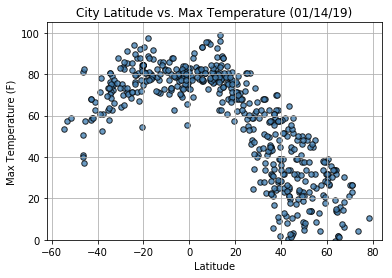

In [107]:
# define axis
x_axis = cities["Lat"]
y = cities["Max Temp"]

# Name plt and x and y axis
plt.title("City Latitude vs. Max Temperature (01/14/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# plot scatterplot graph
plt.scatter(x_axis, y, s=30, marker="o", color="steelblue", edgecolors="black", alpha=0.8)

plt.grid(True)
#plt.show()

#The x limits of our scatter plot is 0 to 100
plt.xlim(-62, 84)
#The y limits of our scatter plot is 0 to 1
plt.ylim(0, 105)

# Save Figure
# plt.savefig("..Images/fig1.jpeg")

#### Latitude vs. Humidity Plot

(0, 105)

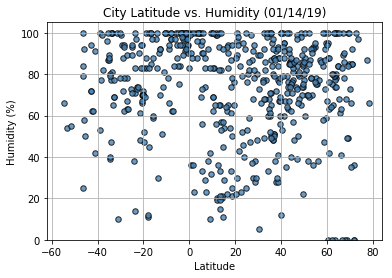

In [99]:
# define axis
x_axis = cities["Lat"]
y_axis = cities["Humidity"]

# Name plt and x and y axis
plt.title("City Latitude vs. Humidity (01/14/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# plot scatterplot graph
plt.scatter(x_axis, y_axis, s=30, marker="o", color="steelblue", edgecolors="black", alpha=0.8)
plt.grid(True)
#plt.show()

#The x limits of our scatter plot is 0 to 100
plt.xlim(-62, 84)
#The y limits of our scatter plot is 0 to 1
plt.ylim(0, 105)

# Save Figure
#plt.savefig("../Images/fig1.png")

#### Latitude vs. Cloudiness Plot

(0, 105)

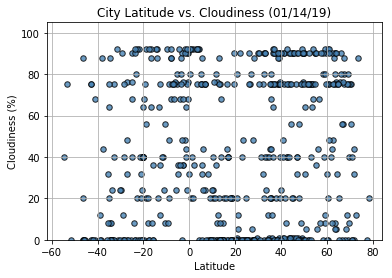

In [100]:
# define axis
x_axis = cities["Lat"]
y_axis = cities["Cloudiness"]

# Name plt and x and y axis
plt.title("City Latitude vs. Cloudiness (01/14/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# plot scatterplot graph
plt.scatter(x_axis, y_axis, s=30, marker="o", color="steelblue", edgecolors="black", alpha=0.8)
plt.grid(True)
#plt.show()

#The x limits of our scatter plot is 0 to 100
plt.xlim(-62, 84)
#The y limits of our scatter plot is 0 to 1
plt.ylim(0, 105)

# Save Figure
#plt.savefig("../Images/fig1.png")

#### Latitude vs. Wind Speed Plot

(-2, 34)

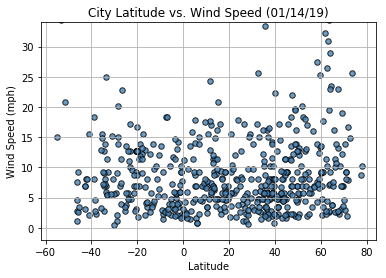

In [101]:
# define axis
x_axis = cities["Lat"]
z_axis = cities["Wind Speed"]

# Name plt and x and y axis
plt.title("City Latitude vs. Wind Speed (01/14/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# plot scatterplot graph
plt.scatter(x_axis, z_axis, s=30, marker="o", color="steelblue", edgecolors="black", alpha=0.8)
plt.grid(True)
#plt.show()

#The x limits of our scatter plot is 0 to 100
plt.xlim(-62, 84)
#The y limits of our scatter plot is 0 to 1
plt.ylim(-2, 34)

# Save Figure
#plt.savefig("../Images/fig1.png")